## Imports and setup

In [1]:
import os
import re
import matplotlib.pyplot as plt

from performance.utils import process_log_dir

import mplhep as hep
plt.style.use(hep.style.ATLAS)
plt.rcParams['legend.loc'] = 'upper right'

TITLE = "1 NVIDIA A100 SXM4 80GB on Perlmutter, ODD detector, traccc main"

log_dir = 'data/logs_odd_main_throughput_10events'
data = process_log_dir(log_dir)

Skipping mu_vs_throughput.pdf. Not a log file.


### Plot

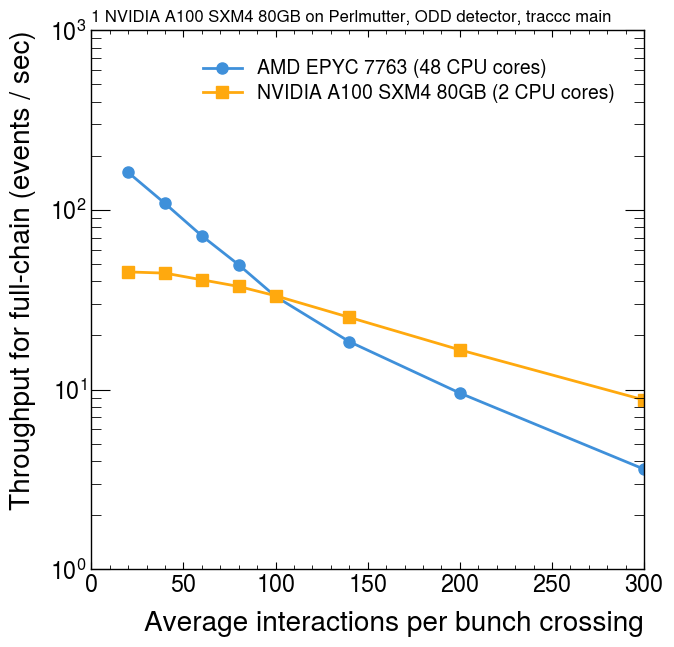

In [2]:
plt.figure(figsize=(7, 7))

cpu_mu = sorted(data['cpu'].keys())
cpu_time = [data['cpu'][mu] for mu in cpu_mu]
plt.plot(cpu_mu, cpu_time, label='AMD EPYC 7763 (48 CPU cores)', marker='o')

gpu_mu = sorted(data['gpu'].keys())
gpu_time = [data['gpu'][mu] for mu in gpu_mu]

plt.plot(gpu_mu, gpu_time, label='NVIDIA A100 SXM4 80GB (2 CPU cores)', marker='s')
plt.xlabel('Average interactions per bunch crossing', loc='right')
plt.ylabel('Throughput for full-chain (events / sec)', loc='top')
plt.title(TITLE, loc='left', fontsize=12)
plt.legend()
plt.yscale('log')

### Save

In [ ]:
plt.savefig(f'{log_dir}/mu_vs_throughput.pdf', bbox_inches='tight')